<H1>Start

<h2>Some housekeeping

<h2>These codes work in both windows and macintosh operating systems, as long as the Python version is 3.11 and above. 

Check your version

In [81]:
from platform import python_version
print(python_version())

3.11.5


If the codes are not running, i.e., no output cells, no error messages, retart the Kernel, go to 'Kernel' at the top of the tool bar, choose "Retart Kernel"

Use the "run" button in the tool bar to executive the codes in each cell, or hightlight the cell then "shift + enter". You can do a "Run All Cells" under the "Run" function in the tool bar to run all the codes in once.

<h1>The Basics of Python coding

<h1>Understand the different types of variables and the associated operators

`first_name`, `second_name`, `name` are the created variables. Enter inputs in the right hand side of the "=". Use " " for string variables, 

In [82]:
first_name = "Taylor"
second_name = "Swift"
name = first_name + " " + second_name
print(name)

number_t=name.count('t') #count the number of t in name
print("Times t appears in the name is:",number_t)

Age_years = 35
Age_hours = round(24*365.25*Age_years)#default value of the round function is 0
print("Age_hours is:",Age_hours,".")

month = 12
day = 13
if month > day:
    print("month > day")
else:
    print("Month is not greater than day.")


name = "Taylor Swift"
print('YOU ROCK' + ' ' + name.upper() + '!') #upper(): upper case

Taylor Swift
Times t appears in the name is: 1
Age_hours is: 306810 .
Month is not greater than day.
YOU ROCK TAYLOR SWIFT!


<h2>Run the following codes will create 4 files, DATA.csv, correlation_matrix_heatmap.png, summary_output.xlsx, and panel_ols_summary_output.xlsx. All files created will be stored under the same folder as this jupyter notebook. Make sure your group_{number}_data.csv is in the same folder as this jupyter notebook "PythonAnalysis_FINAL" in order to run this notebook properly.

<h2>Suggested steps:

<h3>Understand the notebook as a whole. Refer to relevant sections in the lecture notes and other reference materials, such as teaching notes, the 'Assessment-Details' document and research papers, to grasp the key concepts and the purpose of this project.
    
<h3>You can break the jupyter notebook into TWO main sections:
    
<h3>1. Focus on understanding the Perform Exploratory Data Analysis, which involves manipulating dataframes and preparing data for Principal Component Analysis (PCA). 
    
<h3>2. Regression analysis; compare and contrast different models to comprehend their purposes fully.

<h1>PART ONE

<h2> Step 1: Import the libraries

In [83]:
import matplotlib.pyplot as plt #data visulisation package
import pandas as pd #pandas to create dataframe
import seaborn as sns #seaborn for graph plots
import numpy as np #numpy for data manipulation

<h2>Step 2: Understand the data using pandas

Read the csv file you just scraped using the "student_scraper.ipynp" file into a dataframe in pandas as 'group_53_data.csv' (the name on the left hand side of the "=") is the name of the dataframe we create, you can use whatever name that suits; the csv file name (on the right hand side of the "=") your group scraped is not going to be 'group_53_data.csv', it will be 'group_#_data.csv', the # is the group number your lecturer allocates to your group.

In [84]:
group_53_data=pd.read_csv("group_53_data.csv")

<h3>Perform Exploratory Data Analysis (EDA)

Find out the data rows and columns. The first value=number of rows, the second value=number of columns. This sample dataset has 40 firm-year observations and 11 variables. The next line of code shows what these 11 variables are. **Report the total observations in your report**. 

In [85]:
group_53_data.shape 

(756, 11)

Display the data, python starts the row and column from 0, not 1; hence the last row = (number of rows -1)

In [86]:
group_53_data

,Company-Year,Sector,stock_FinancialYEnd,stock_FollowingQtrEnd,BasicEPS,total shareholder's equity,Basic avg shares,NetIncomeAvailShareholders,ESG Risk Exposure Score,ESG Risk Managed Score,Sustainalytics ESG Risk Classification
0,ABT-2020,Health Care,112.091141,108.870796,2.54,"32,784,000","1,771,230","4,495,000",50.567,20.357,5.667
1,ABT-2021,Health Care,112.418045,103.559509,4.01,"35,802,000","1,764,082","7,071,000",49.854,21.682,5.000
2,ABT-2022,Health Care,97.790382,105.761192,3.99,"36,686,000","1,737,795","6,933,000",48.938,23.466,5.000
3,ABT-2023,Health Care,111.961365,102.851555,3.30,"38,603,000","1,734,076","5,723,000",48.000,23.054,5.000
4,ADM-2020,Consumer Staples,52.451912,56.154476,3.19,"20,000,000","556,000","1,772,000",58.750,24.183,7.000
...,...,...,...,...,...,...,...,...,...,...,...
751,ZBH-2023,Health Care,131.440140,108.289314,4.91,"12,480,500","208,700","1,024,000",48.800,22.318,5.000
752,ZBRA-2020,Information Technology,485.179993,529.489990,9.43,"2,144,000","53,441","504,000",22.650,8.405,3.000
753,ZBRA-2021,Information Technology,413.700012,293.950012,15.66,"2,984,000","53,446","837,000",22.162,9.012,3.000
754,ZBRA-2022,Information Technology,318.000000,295.829987,8.86,"2,733,000","52,208","463,000",21.850,9.305,3.000


List the *fist* five rows of the data

In [87]:
group_53_data.head() #default is 5, can put any number in ()

,Company-Year,Sector,stock_FinancialYEnd,stock_FollowingQtrEnd,BasicEPS,total shareholder's equity,Basic avg shares,NetIncomeAvailShareholders,ESG Risk Exposure Score,ESG Risk Managed Score,Sustainalytics ESG Risk Classification
0,ABT-2020,Health Care,112.091141,108.870796,2.54,"32,784,000","1,771,230","4,495,000",50.567,20.357,5.667
1,ABT-2021,Health Care,112.418045,103.559509,4.01,"35,802,000","1,764,082","7,071,000",49.854,21.682,5.000
2,ABT-2022,Health Care,97.790382,105.761192,3.99,"36,686,000","1,737,795","6,933,000",48.938,23.466,5.000
3,ABT-2023,Health Care,111.961365,102.851555,3.30,"38,603,000","1,734,076","5,723,000",48.000,23.054,5.000
4,ADM-2020,Consumer Staples,52.451912,56.154476,3.19,"20,000,000","556,000","1,772,000",58.750,24.183,7.000


List the *last* five rows of the data

In [88]:
group_53_data.tail()

,Company-Year,Sector,stock_FinancialYEnd,stock_FollowingQtrEnd,BasicEPS,total shareholder's equity,Basic avg shares,NetIncomeAvailShareholders,ESG Risk Exposure Score,ESG Risk Managed Score,Sustainalytics ESG Risk Classification
751,ZBH-2023,Health Care,131.440140,108.289314,4.91,"12,480,500","208,700","1,024,000",48.800,22.318,5.0
752,ZBRA-2020,Information Technology,485.179993,529.489990,9.43,"2,144,000","53,441","504,000",22.650,8.405,3.0
753,ZBRA-2021,Information Technology,413.700012,293.950012,15.66,"2,984,000","53,446","837,000",22.162,9.012,3.0
754,ZBRA-2022,Information Technology,318.000000,295.829987,8.86,"2,733,000","52,208","463,000",21.850,9.305,3.0
755,ZBRA-2023,Information Technology,301.440002,308.929993,5.75,"3,036,000","51,378","296,000",21.500,9.389,3.0


<h5>Check if any column has missing values

If the second column in the output cell is all 0 means there is no missing observations. If ther is 0 in the column, consider dropping these variables (columns) or use other extrapoliation methods to fill the missing values. **Report your findings**.

In [89]:
group_53_data.isnull().sum()

Company-Year                              0
Sector                                    0
stock_FinancialYEnd                       0
stock_FollowingQtrEnd                     0
BasicEPS                                  0
total shareholder's equity                0
Basic avg shares                          0
NetIncomeAvailShareholders                0
ESG Risk Exposure Score                   0
ESG Risk Managed Score                    0
Sustainalytics ESG Risk Classification    0
dtype: int64

List all the columns names

In [90]:
group_53_data.columns

Index(['Company-Year', 'Sector', 'stock_FinancialYEnd',
       'stock_FollowingQtrEnd', 'BasicEPS', 'total shareholder's equity',
       'Basic avg shares', 'NetIncomeAvailShareholders',
       'ESG Risk Exposure Score', 'ESG Risk Managed Score',
       'Sustainalytics ESG Risk Classification'],
      dtype='object')

List selected columns: `Company-Year`, `stock_FinancialYEnd`

In [91]:
group_53_data[['Company-Year', 'stock_FinancialYEnd']]

,Company-Year,stock_FinancialYEnd
0,ABT-2020,112.091141
1,ABT-2021,112.418045
2,ABT-2022,97.790382
3,ABT-2023,111.961365
4,ADM-2020,52.451912
...,...,...
751,ZBH-2023,131.440140
752,ZBRA-2020,485.179993
753,ZBRA-2021,413.700012
754,ZBRA-2022,318.000000


List the first 2 rows of the selected columns

In [92]:
group_53_data[0:2][['ESG Risk Exposure Score', 'ESG Risk Managed Score']]

,ESG Risk Exposure Score,ESG Risk Managed Score
0,50.567,20.357
1,49.854,21.682


Show the observatoins under the `Sector` column.

In [93]:
group_53_data[['Sector']]

,Sector
0,Health Care
1,Health Care
2,Health Care
3,Health Care
4,Consumer Staples
...,...
751,Health Care
752,Information Technology
753,Information Technology
754,Information Technology


Find out the data type of `Sector`. If the answer is *float* or *int*, the variable is stored as a number; if it is *object* then the variable is stored as a string, pandas only reads *float* and *int* as numbers. At a later step, we will covert the string variables into *float* or *int* in order to run regression analysis.

In [94]:
print(group_53_data['Sector'].dtype)

object


List the unique values under `Sector`, **report the findings**.

In [95]:
pd.unique(group_53_data['Sector'])

array(['Health Care', 'Consumer Staples', 'Utilities',
       'Information Technology', 'Materials', 'Industrials',
       'Real Estate', 'Consumer Discretionary', 'Financials',
       'Communication Services'], dtype=object)

How many rows (firms) under each `Sector`? **Report the findings.**

In [96]:
group_53_data['Sector'].value_counts()

Sector
Health Care               80
Utilities                 80
Information Technology    80
Materials                 80
Industrials               80
Real Estate               80
Consumer Discretionary    80
Financials                80
Consumer Staples          60
Communication Services    56
Name: count, dtype: int64

<h4>Boolean indexing

Find out what company is not in the "Energy" sector, "True" means that the company is not in the Energy sector.

In [97]:
group_53_data['Sector']!='Energy'

0      True
1      True
2      True
3      True
4      True
       ... 
751    True
752    True
753    True
754    True
755    True
Name: Sector, Length: 756, dtype: bool

Filter the data with the boolean indexing: only show data that are not in the "Energy" sector using "!="

In [98]:
group_53_data[group_53_data['Sector'] != 'Energy']

,Company-Year,Sector,stock_FinancialYEnd,stock_FollowingQtrEnd,BasicEPS,total shareholder's equity,Basic avg shares,NetIncomeAvailShareholders,ESG Risk Exposure Score,ESG Risk Managed Score,Sustainalytics ESG Risk Classification
0,ABT-2020,Health Care,112.091141,108.870796,2.54,"32,784,000","1,771,230","4,495,000",50.567,20.357,5.667
1,ABT-2021,Health Care,112.418045,103.559509,4.01,"35,802,000","1,764,082","7,071,000",49.854,21.682,5.000
2,ABT-2022,Health Care,97.790382,105.761192,3.99,"36,686,000","1,737,795","6,933,000",48.938,23.466,5.000
3,ABT-2023,Health Care,111.961365,102.851555,3.30,"38,603,000","1,734,076","5,723,000",48.000,23.054,5.000
4,ADM-2020,Consumer Staples,52.451912,56.154476,3.19,"20,000,000","556,000","1,772,000",58.750,24.183,7.000
...,...,...,...,...,...,...,...,...,...,...,...
751,ZBH-2023,Health Care,131.440140,108.289314,4.91,"12,480,500","208,700","1,024,000",48.800,22.318,5.000
752,ZBRA-2020,Information Technology,485.179993,529.489990,9.43,"2,144,000","53,441","504,000",22.650,8.405,3.000
753,ZBRA-2021,Information Technology,413.700012,293.950012,15.66,"2,984,000","53,446","837,000",22.162,9.012,3.000
754,ZBRA-2022,Information Technology,318.000000,295.829987,8.86,"2,733,000","52,208","463,000",21.850,9.305,3.000


Find out how many companies are NOT in the 'Energy' sector. In this output, the first number is the number of observations, i.e., companies. **Report your findings**.

In [99]:
group_53_data[group_53_data['Sector'] != 'Energy'].shape

(756, 11)

What are the 10 highest year-end `stock_FinancialYEnd` stock prices, the 10 highest quarter after the year-end `stock_FollowingQtrEnd` stock prices? **Report your findings**.

In [100]:
group_53_data.nlargest(10, ['stock_FinancialYEnd'])

,Company-Year,Sector,stock_FinancialYEnd,stock_FollowingQtrEnd,BasicEPS,total shareholder's equity,Basic avg shares,NetIncomeAvailShareholders,ESG Risk Exposure Score,ESG Risk Managed Score,Sustainalytics ESG Risk Classification
99,BKNG-2023,Consumer Discretionary,3610.309082,3952.402100,118.67,"-2,744,000","36,140","4,289,000",34.675,14.087,4.000
98,BKNG-2022,Consumer Discretionary,2639.563721,2687.251953,76.70,"2,782,000","39,872","3,058,000",35.550,13.266,5.000
97,BKNG-2021,Consumer Discretionary,2337.075928,1740.519165,28.39,"6,178,000","41,042","1,165,000",29.633,9.465,3.333
96,BKNG-2020,Consumer Discretionary,2318.556152,2177.492676,1.45,"4,893,000","40,974","59,000",28.209,8.692,3.000
494,MTD-2022,Health Care,1530.209961,1311.640015,38.79,"24,793","22,492","872,502",28.775,15.651,3.000
493,MTD-2021,Health Care,1373.189941,1148.770020,33.25,"171,421","23,130","768,985",29.300,16.543,3.000
495,MTD-2023,Health Care,1331.290039,1397.589966,36.10,"-149,938","21,848","788,778",28.338,15.145,3.000
492,MTD-2020,Health Care,1155.689941,1385.339966,25.24,"282,675","23,883","602,739",29.300,17.596,3.000
335,GWW-2023,Industrials,1013.131409,900.305725,36.39,"3,115,000","49,900","1,829,000",30.517,14.778,3.000
615,REGN-2023,Health Care,962.489990,1051.030029,37.05,"25,973,100","106,700","3,953,600",36.400,18.382,3.000


In [101]:
group_53_data.nlargest(10, ['stock_FollowingQtrEnd'])

,Company-Year,Sector,stock_FinancialYEnd,stock_FollowingQtrEnd,BasicEPS,total shareholder's equity,Basic avg shares,NetIncomeAvailShareholders,ESG Risk Exposure Score,ESG Risk Managed Score,Sustainalytics ESG Risk Classification
99,BKNG-2023,Consumer Discretionary,3610.309082,3952.402100,118.67,"-2,744,000","36,140","4,289,000",34.675,14.087,4.000
98,BKNG-2022,Consumer Discretionary,2639.563721,2687.251953,76.70,"2,782,000","39,872","3,058,000",35.550,13.266,5.000
96,BKNG-2020,Consumer Discretionary,2318.556152,2177.492676,1.45,"4,893,000","40,974","59,000",28.209,8.692,3.000
97,BKNG-2021,Consumer Discretionary,2337.075928,1740.519165,28.39,"6,178,000","41,042","1,165,000",29.633,9.465,3.333
495,MTD-2023,Health Care,1331.290039,1397.589966,36.10,"-149,938","21,848","788,778",28.338,15.145,3.000
492,MTD-2020,Health Care,1155.689941,1385.339966,25.24,"282,675","23,883","602,739",29.300,17.596,3.000
494,MTD-2022,Health Care,1530.209961,1311.640015,38.79,"24,793","22,492","872,502",28.775,15.651,3.000
493,MTD-2021,Health Care,1373.189941,1148.770020,33.25,"171,421","23,130","768,985",29.300,16.543,3.000
615,REGN-2023,Health Care,962.489990,1051.030029,37.05,"25,973,100","106,700","3,953,600",36.400,18.382,3.000
423,LLY-2023,Health Care,775.277283,903.839417,5.83,"10,771,900","899,379","5,240,400",48.350,24.018,5.000


Split the `Company-Year` column into two columns: Company, Year

In [102]:
group_53_data[['Company', 'Year']] = group_53_data['Company-Year'].str.split('-', expand=True)

Check the columns

In [103]:
group_53_data.head()

,Company-Year,Sector,stock_FinancialYEnd,stock_FollowingQtrEnd,BasicEPS,total shareholder's equity,Basic avg shares,NetIncomeAvailShareholders,ESG Risk Exposure Score,ESG Risk Managed Score,Sustainalytics ESG Risk Classification,Company,Year
0,ABT-2020,Health Care,112.091141,108.870796,2.54,"32,784,000","1,771,230","4,495,000",50.567,20.357,5.667,ABT,2020
1,ABT-2021,Health Care,112.418045,103.559509,4.01,"35,802,000","1,764,082","7,071,000",49.854,21.682,5.000,ABT,2021
2,ABT-2022,Health Care,97.790382,105.761192,3.99,"36,686,000","1,737,795","6,933,000",48.938,23.466,5.000,ABT,2022
3,ABT-2023,Health Care,111.961365,102.851555,3.30,"38,603,000","1,734,076","5,723,000",48.000,23.054,5.000,ABT,2023
4,ADM-2020,Consumer Staples,52.451912,56.154476,3.19,"20,000,000","556,000","1,772,000",58.750,24.183,7.000,ADM,2020


Rename the dataframe from 'group_53_data' to 'DATA' for easy typing. You can rename it in a different name but must rember the new dataframe name in the future steps or pandas won't recognise it.

In [104]:
DATA=group_53_data

Check the data under the renamed dataframe

In [105]:
DATA.head()

,Company-Year,Sector,stock_FinancialYEnd,stock_FollowingQtrEnd,BasicEPS,total shareholder's equity,Basic avg shares,NetIncomeAvailShareholders,ESG Risk Exposure Score,ESG Risk Managed Score,Sustainalytics ESG Risk Classification,Company,Year
0,ABT-2020,Health Care,112.091141,108.870796,2.54,"32,784,000","1,771,230","4,495,000",50.567,20.357,5.667,ABT,2020
1,ABT-2021,Health Care,112.418045,103.559509,4.01,"35,802,000","1,764,082","7,071,000",49.854,21.682,5.000,ABT,2021
2,ABT-2022,Health Care,97.790382,105.761192,3.99,"36,686,000","1,737,795","6,933,000",48.938,23.466,5.000,ABT,2022
3,ABT-2023,Health Care,111.961365,102.851555,3.30,"38,603,000","1,734,076","5,723,000",48.000,23.054,5.000,ABT,2023
4,ADM-2020,Consumer Staples,52.451912,56.154476,3.19,"20,000,000","556,000","1,772,000",58.750,24.183,7.000,ADM,2020


Reorder the columns so `Company` and `Year` are at the front

In [106]:
DATA=DATA[['Company', 'Year','Company-Year', 'Sector', 'stock_FinancialYEnd', 'stock_FollowingQtrEnd', 
           'BasicEPS', "total shareholder's equity",'Basic avg shares', 'NetIncomeAvailShareholders', 
           'ESG Risk Exposure Score', 'ESG Risk Managed Score', 'Sustainalytics ESG Risk Classification']]

Drop the column `Company-Year`

In [107]:
DATA = DATA.drop(columns=['Company-Year'])

For fixed effect analyses later, map each unique `Sector` with a dummy code and create a new variable/column `SECTOR`. *In your scraped data, the `Sectors` maybe different, check what sectors you have first before the mapping*. **Report the process**.

In [108]:
DATA['Sector'] = DATA['Sector'].astype('category')
 
DATA['SECTOR'] = DATA['Sector'].cat.codes + 1
 
sector_mapping = dict(enumerate(DATA['Sector'].cat.categories, start=1))
print("Sector Mapping:\n", sector_mapping)

Sector Mapping:
 {1: 'Communication Services', 2: 'Consumer Discretionary', 3: 'Consumer Staples', 4: 'Financials', 5: 'Health Care', 6: 'Industrials', 7: 'Information Technology', 8: 'Materials', 9: 'Real Estate', 10: 'Utilities'}


Check your data and **reporting the process**.

In [109]:
DATA.head()

,Company,Year,Sector,stock_FinancialYEnd,stock_FollowingQtrEnd,BasicEPS,total shareholder's equity,Basic avg shares,NetIncomeAvailShareholders,ESG Risk Exposure Score,ESG Risk Managed Score,Sustainalytics ESG Risk Classification,SECTOR
0,ABT,2020,Health Care,112.091141,108.870796,2.54,"32,784,000","1,771,230","4,495,000",50.567,20.357,5.667,5
1,ABT,2021,Health Care,112.418045,103.559509,4.01,"35,802,000","1,764,082","7,071,000",49.854,21.682,5.000,5
2,ABT,2022,Health Care,97.790382,105.761192,3.99,"36,686,000","1,737,795","6,933,000",48.938,23.466,5.000,5
3,ABT,2023,Health Care,111.961365,102.851555,3.30,"38,603,000","1,734,076","5,723,000",48.000,23.054,5.000,5
4,ADM,2020,Consumer Staples,52.451912,56.154476,3.19,"20,000,000","556,000","1,772,000",58.750,24.183,7.000,3


Reorder the columns

In [110]:
DATA=DATA[['Company', 'Year','SECTOR', 'Sector', 'stock_FinancialYEnd', 'stock_FollowingQtrEnd', 'BasicEPS', 
           "total shareholder's equity",'Basic avg shares', 'NetIncomeAvailShareholders', 
           'ESG Risk Exposure Score', 'ESG Risk Managed Score', 'Sustainalytics ESG Risk Classification']]

<h2>Step 3: Descriptive Statistics

First, check the data types to see whether data transformation/conversion is required. **Write the process in your report**, i.e., how many are "object", what are they, and why you need to convert/transform them.

In [111]:
print(DATA.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   Company                                 756 non-null    object  
 1   Year                                    756 non-null    object  
 2   SECTOR                                  756 non-null    int8    
 3   Sector                                  756 non-null    category
 4   stock_FinancialYEnd                     756 non-null    float64 
 5   stock_FollowingQtrEnd                   756 non-null    float64 
 6   BasicEPS                                756 non-null    float64 
 7   total shareholder's equity              756 non-null    object  
 8   Basic avg shares                        756 non-null    object  
 9   NetIncomeAvailShareholders              756 non-null    object  
 10  ESG Risk Exposure Score                 756 non-nu

`Year`,`total shareholder's equity`,`Basic avg shares`, `NetIncomeAvailShareholders` are strings separated by ","; pandas reads them as strings and won't treat them as numbers, we first need to convert them into float type. **Write the process in your report**.

In [112]:
cols=["Year","total shareholder's equity",'Basic avg shares','NetIncomeAvailShareholders']
DATA[cols]=DATA[cols].apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',',''), errors='coerce'))

Check your data again after the conversion

In [113]:
print(DATA.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   Company                                 756 non-null    object  
 1   Year                                    756 non-null    int64   
 2   SECTOR                                  756 non-null    int8    
 3   Sector                                  756 non-null    category
 4   stock_FinancialYEnd                     756 non-null    float64 
 5   stock_FollowingQtrEnd                   756 non-null    float64 
 6   BasicEPS                                756 non-null    float64 
 7   total shareholder's equity              756 non-null    int64   
 8   Basic avg shares                        756 non-null    int64   
 9   NetIncomeAvailShareholders              756 non-null    int64   
 10  ESG Risk Exposure Score                 756 non-nu

Round the selected variables into 2 decimal places

In [114]:
DATA.round({"stock_FinancialYEnd":2, "stock_FollowingQtrEnd":2, "ESG Risk Exposure Score":2, 
            "ESG Risk Managed Score":2, "Sustainalytics ESG Risk Classification":2 })

,Company,Year,SECTOR,Sector,stock_FinancialYEnd,stock_FollowingQtrEnd,BasicEPS,total shareholder's equity,Basic avg shares,NetIncomeAvailShareholders,ESG Risk Exposure Score,ESG Risk Managed Score,Sustainalytics ESG Risk Classification
0,ABT,2020,5,Health Care,112.09,108.87,2.54,32784000,1771230,4495000,50.57,20.36,5.67
1,ABT,2021,5,Health Care,112.42,103.56,4.01,35802000,1764082,7071000,49.85,21.68,5.00
2,ABT,2022,5,Health Care,97.79,105.76,3.99,36686000,1737795,6933000,48.94,23.47,5.00
3,ABT,2023,5,Health Care,111.96,102.85,3.30,38603000,1734076,5723000,48.00,23.05,5.00
4,ADM,2020,3,Consumer Staples,52.45,56.15,3.19,20000000,556000,1772000,58.75,24.18,7.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,ZBH,2023,5,Health Care,131.44,108.29,4.91,12480500,208700,1024000,48.80,22.32,5.00
752,ZBRA,2020,7,Information Technology,485.18,529.49,9.43,2144000,53441,504000,22.65,8.40,3.00
753,ZBRA,2021,7,Information Technology,413.70,293.95,15.66,2984000,53446,837000,22.16,9.01,3.00
754,ZBRA,2022,7,Information Technology,318.00,295.83,8.86,2733000,52208,463000,21.85,9.30,3.00


Create a new variable (book value to equity) `BVE`; **report the process**.

In [115]:
DATA['BVE'] = DATA["total shareholder's equity"] / DATA['Basic avg shares']

<h2>Step 4: PCA analysis

Import liabraries to run PCA

In [116]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Create an index `esg_index` using PCA for all 3 ESG scores, and **report the process**. 

In [117]:
esg_scores = DATA[['ESG Risk Exposure Score', 'ESG Risk Managed Score', 'Sustainalytics ESG Risk Classification']]

Standardise the features

In [118]:
scaler = StandardScaler()
esg_scores_scaled = scaler.fit_transform(esg_scores)

Apply PCA

In [119]:
pca = PCA(n_components=1)
esg_index = pca.fit_transform(esg_scores_scaled)

Create a new variable `ESG_Index` and add it to the dataframe

In [120]:
DATA['ESG_Index']=esg_index

In [121]:
DATA.head()

,Company,Year,SECTOR,Sector,stock_FinancialYEnd,stock_FollowingQtrEnd,BasicEPS,total shareholder's equity,Basic avg shares,NetIncomeAvailShareholders,ESG Risk Exposure Score,ESG Risk Managed Score,Sustainalytics ESG Risk Classification,BVE,ESG_Index
0,ABT,2020,5,Health Care,112.091141,108.870796,2.54,32784000,1771230,4495000,50.567,20.357,5.667,18.509172,1.053815
1,ABT,2021,5,Health Care,112.418045,103.559509,4.01,35802000,1764082,7071000,49.854,21.682,5.000,20.294975,0.875284
2,ABT,2022,5,Health Care,97.790382,105.761192,3.99,36686000,1737795,6933000,48.938,23.466,5.000,21.110660,0.953993
3,ABT,2023,5,Health Care,111.961365,102.851555,3.30,38603000,1734076,5723000,48.000,23.054,5.000,22.261423,0.875560
4,ADM,2020,3,Consumer Staples,52.451912,56.154476,3.19,20000000,556000,1772000,58.750,24.183,7.000,35.971223,2.224718


Check the variance loading, **report the variance loading in your report and interpret what the loading means**.

In [122]:
print("\nExplained variance ratio:", pca.explained_variance_ratio_[0])


Explained variance ratio: 0.7814806781848829


Show the loadings (importance) of each ESG score in the index. The highest loading is component 1, Python will creat a PCA using the highest loading. **Report the loading**. 

In [123]:
loadings = pd.DataFrame(
    pca.components_.T,
    columns=['Loading'],
    index=['ESG Risk Exposure Score', 'ESG Risk Managed Score', 'Sustainalytics ESG Risk Classification']
)
print("\nPCA Loadings:")
print(loadings) 


PCA Loadings:
                                         Loading
ESG Risk Exposure Score                 0.648819
ESG Risk Managed Score                  0.552606
Sustainalytics ESG Risk Classification  0.523126


***Correlation matrix*** 

Perform correlation analysis and print out the heatmap.

Must specify the non-string variables otherwise the corr() code won't run. Save the matrix heatmap, **include it in your report**.

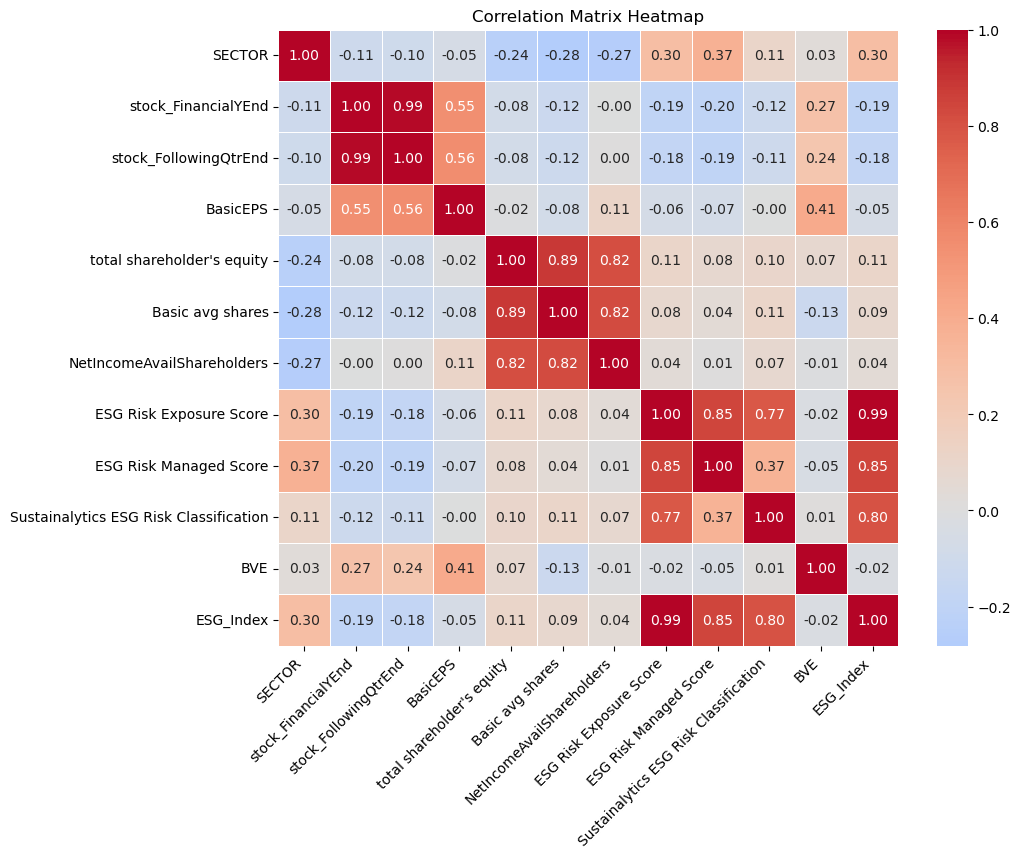

In [124]:
correlation_matrix = DATA[
    ['SECTOR', 'stock_FinancialYEnd', 'stock_FollowingQtrEnd', 'BasicEPS', "total shareholder's equity",
     'Basic avg shares', 'NetIncomeAvailShareholders', 'ESG Risk Exposure Score', 'ESG Risk Managed Score', 
     'Sustainalytics ESG Risk Classification', 'BVE', 'ESG_Index']
].corr()

plt.figure(figsize=(10, 8)) # Set up the matplotlib figure
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=45, ha='right')
plt.savefig('correlation_matrix_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

Rename the columns, the statsmodels library does not recognise variables with 'space'.

In [125]:
DATA.rename(columns={"NetIncomeAvailShareholders": "profit", 
                     "ESG Risk Exposure Score": "ESG_Exposure", 
                     "ESG Risk Managed Score": "ESG_Managed", 
                     "Sustainalytics ESG Risk Classification": "ESG_Class"}, inplace=True)

Check the dataframe after renaming

In [126]:
DATA.head()

,Company,Year,SECTOR,Sector,stock_FinancialYEnd,stock_FollowingQtrEnd,BasicEPS,total shareholder's equity,Basic avg shares,profit,ESG_Exposure,ESG_Managed,ESG_Class,BVE,ESG_Index
0,ABT,2020,5,Health Care,112.091141,108.870796,2.54,32784000,1771230,4495000,50.567,20.357,5.667,18.509172,1.053815
1,ABT,2021,5,Health Care,112.418045,103.559509,4.01,35802000,1764082,7071000,49.854,21.682,5.000,20.294975,0.875284
2,ABT,2022,5,Health Care,97.790382,105.761192,3.99,36686000,1737795,6933000,48.938,23.466,5.000,21.110660,0.953993
3,ABT,2023,5,Health Care,111.961365,102.851555,3.30,38603000,1734076,5723000,48.000,23.054,5.000,22.261423,0.875560
4,ADM,2020,3,Consumer Staples,52.451912,56.154476,3.19,20000000,556000,1772000,58.750,24.183,7.000,35.971223,2.224718


Save the new dataframe to csv

In [127]:
DATA.to_csv('DATA.csv')

<h1>PART TWO

<h2>Regression Analysis

We have provided a few different stats models here; choose the best model to interpet the results. Due to the random data scraping, you may find some models perform better/poorer, **export the results and include them in your report as sensitive analyses and state that you have tried other models**. Focus on interpretting the model(s) that yield the best results, i.e., with significant parameters (p-value<10%) of `BVE`, `BasicEPS`, `4 ESG scores` (try one score at a time, four scores in one model may not run as they are correlated).

<h2>Install fixed effect model and statsmodels

In [128]:
%pip install FixedEffectModel
import statsmodels.api as sm
import statsmodels.formula.api as smf

Note: you may need to restart the kernel to use updated packages.


<h2>Estimate a few simple Ohlsson models, export the tables that you think are important to Excel, report them in your report and discuss the results. 

In [129]:
model=smf.ols('stock_FinancialYEnd ~ BVE + BasicEPS', data=DATA)
results=model.fit()
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     stock_FinancialYEnd   R-squared:                       0.303
Model:                             OLS   Adj. R-squared:                  0.301
Method:                  Least Squares   F-statistic:                     163.4
Date:                 Wed, 11 Jun 2025   Prob (F-statistic):           1.16e-59
Time:                         14:50:48   Log-Likelihood:                -5114.1
No. Observations:                  756   AIC:                         1.023e+04
Df Residuals:                      753   BIC:                         1.025e+04
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     90.3686      9.892      9.13

In the above regression model, the p-value for the coefficient of `BVE` is very small, indicating that `BVE` is a statistically significant predictor of `stock_FinancialYEnd`. This means there is strong evidence that `BVE` contributes to explaining the variations in `stock_FinancialYEnd`. However, the p-value for `BasicEPS` is large - greater than 10%, suggesting that `BasicEPS` is not a statistically significant predictor at conventional levels. 

In the next model, we include `profit` as an additional predictor variable to test its significance. You may consider experimenting with different combinations of variables to identify which ones significantly impact `stock_FinancialYEnd`. The results and significance of these variables will vary depending on the dataset used, so it is important to analyse the model output carefully for each specific case.

You can also try using `stock_FollowingQtrEnd` as the dependent (LHS) variable. 

In [130]:
model=smf.ols('stock_FinancialYEnd ~ BVE + BasicEPS + stock_FollowingQtrEnd', data=DATA)
results=model.fit()
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     stock_FinancialYEnd   R-squared:                       0.973
Model:                             OLS   Adj. R-squared:                  0.973
Method:                  Least Squares   F-statistic:                     9043.
Date:                 Wed, 11 Jun 2025   Prob (F-statistic):               0.00
Time:                         14:50:48   Log-Likelihood:                -3884.6
No. Observations:                  756   AIC:                             7777.
Df Residuals:                      752   BIC:                             7796.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept           

Add ESG scores as an independent variable

In [131]:
model=smf.ols('stock_FollowingQtrEnd ~ BVE + BasicEPS + ESG_Exposure', data=DATA)
results=model.fit()
print(results.summary())

                              OLS Regression Results                             
Dep. Variable:     stock_FollowingQtrEnd   R-squared:                       0.331
Model:                               OLS   Adj. R-squared:                  0.329
Method:                    Least Squares   F-statistic:                     124.2
Date:                   Wed, 11 Jun 2025   Prob (F-statistic):           2.53e-65
Time:                           14:50:49   Log-Likelihood:                -5097.3
No. Observations:                    756   AIC:                         1.020e+04
Df Residuals:                        752   BIC:                         1.022e+04
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      215

In [132]:
model=smf.ols('stock_FollowingQtrEnd ~ BVE + BasicEPS + ESG_Managed', data=DATA)
results=model.fit()
print(results.summary())

                              OLS Regression Results                             
Dep. Variable:     stock_FollowingQtrEnd   R-squared:                       0.332
Model:                               OLS   Adj. R-squared:                  0.329
Method:                    Least Squares   F-statistic:                     124.7
Date:                   Wed, 11 Jun 2025   Prob (F-statistic):           1.53e-65
Time:                           14:50:49   Log-Likelihood:                -5096.8
No. Observations:                    756   AIC:                         1.020e+04
Df Residuals:                        752   BIC:                         1.022e+04
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     183.32

<h2>Estimate a few simple Ohlsson model with robust errors 

You will need to conduct your own research to understand Ohlsson model with robust errors and interpret the statistics in this section. **Report your findings**.

In [133]:
model=smf.ols('stock_FinancialYEnd ~ BVE + BasicEPS', data=DATA)
results=model.fit(cov_type='HC1') #HC1 is the Huber-White standard errros, can try HC3 heteroscedasticity-consistent estimator
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     stock_FinancialYEnd   R-squared:                       0.303
Model:                             OLS   Adj. R-squared:                  0.301
Method:                  Least Squares   F-statistic:                     8.696
Date:                 Wed, 11 Jun 2025   Prob (F-statistic):           0.000185
Time:                         14:50:49   Log-Likelihood:                -5114.1
No. Observations:                  756   AIC:                         1.023e+04
Df Residuals:                      753   BIC:                         1.025e+04
Df Model:                            2                                         
Covariance Type:                   HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     90.3686     17.217      5.24

Add the ESG risk scores, try a different score one at a time, or a combination of different scores.

In [159]:
model = smf.ols('stock_FinancialYEnd ~ BVE + +BasicEPS + ESG_Exposure', data=DATA)
results=model.fit(cov_type='HC1')
print(results.summary())


                             OLS Regression Results                            
Dep. Variable:     stock_FinancialYEnd   R-squared:                       0.327
Model:                             OLS   Adj. R-squared:                  0.324
Method:                  Least Squares   F-statistic:                     20.58
Date:                 Wed, 11 Jun 2025   Prob (F-statistic):           7.96e-13
Time:                         15:19:49   Log-Likelihood:                -5100.6
No. Observations:                  756   AIC:                         1.021e+04
Df Residuals:                      752   BIC:                         1.023e+04
Df Model:                            3                                         
Covariance Type:                   HC1                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      221.5357     24.267    

In [ ]:
model = smf.ols('stock_FinancialYEnd ~ BVE + BasicEPS + ESG_Managed', data=DATA)
results=model.fit(cov_type='HC1')
print(results.summary())


                             OLS Regression Results                            
Dep. Variable:     stock_FinancialYEnd   R-squared:                       0.328
Model:                             OLS   Adj. R-squared:                  0.325
Method:                  Least Squares   F-statistic:                     19.78
Date:                 Wed, 11 Jun 2025   Prob (F-statistic):           2.37e-12
Time:                         15:30:40   Log-Likelihood:                -5100.0
No. Observations:                  756   AIC:                         1.021e+04
Df Residuals:                      752   BIC:                         1.023e+04
Df Model:                            3                                         
Covariance Type:                   HC1                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     186.7415     19.853      9

In [ ]:
model = smf.ols('stock_FinancialYEnd ~ BVE + BasicEPS + ESG_Class', data=DATA)
results=model.fit(cov_type='HC1')
print(results.summary())


                             OLS Regression Results                            
Dep. Variable:     stock_FinancialYEnd   R-squared:                       0.317
Model:                             OLS   Adj. R-squared:                  0.314
Method:                  Least Squares   F-statistic:                     12.85
Date:                 Wed, 11 Jun 2025   Prob (F-statistic):           3.38e-08
Time:                         15:19:57   Log-Likelihood:                -5106.3
No. Observations:                  756   AIC:                         1.022e+04
Df Residuals:                      752   BIC:                         1.024e+04
Df Model:                            3                                         
Covariance Type:                   HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    181.7537     25.496      7.12

In [ ]:
model=smf.ols('stock_FinancialYEnd ~ BVE + BasicEPS + ESG_Index', data=DATA)
results=model.fit(cov_type='HC1') #HC1 is the Huber-White standard errros, can try HC3 heteroscedasticity-consistent estimator
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     stock_FinancialYEnd   R-squared:                       0.330
Model:                             OLS   Adj. R-squared:                  0.327
Method:                  Least Squares   F-statistic:                     19.56
Date:                 Wed, 11 Jun 2025   Prob (F-statistic):           3.21e-12
Time:                         14:50:49   Log-Likelihood:                -5099.1
No. Observations:                  756   AIC:                         1.021e+04
Df Residuals:                      752   BIC:                         1.022e+04
Df Model:                            3                                         
Covariance Type:                   HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     91.4277     17.158      5.32

In [162]:
model = smf.ols('stock_FollowingQtrEnd ~ BVE + BasicEPS + ESG_Index', data=DATA)
results=model.fit(cov_type='HC1')
print(results.summary())

                              OLS Regression Results                             
Dep. Variable:     stock_FollowingQtrEnd   R-squared:                       0.333
Model:                               OLS   Adj. R-squared:                  0.331
Method:                    Least Squares   F-statistic:                     19.17
Date:                   Wed, 11 Jun 2025   Prob (F-statistic):           5.51e-12
Time:                           15:20:00   Log-Likelihood:                -5096.1
No. Observations:                    756   AIC:                         1.020e+04
Df Residuals:                        752   BIC:                         1.022e+04
Df Model:                              3                                         
Covariance Type:                     HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     93.4487 

In [ ]:
model = smf.ols('stock_FollowingQtrEnd ~ BVE + BasicEPS + ESG_Exposure + ESG_Managed', data=DATA)
results=model.fit(cov_type='HC1')
print

                              OLS Regression Results                             
Dep. Variable:     stock_FollowingQtrEnd   R-squared:                       0.334
Model:                               OLS   Adj. R-squared:                  0.330
Method:                    Least Squares   F-statistic:                     15.48
Date:                   Wed, 11 Jun 2025   Prob (F-statistic):           3.54e-12
Time:                           15:21:00   Log-Likelihood:                -5096.0
No. Observations:                    756   AIC:                         1.020e+04
Df Residuals:                        751   BIC:                         1.023e+04
Df Model:                              4                                         
Covariance Type:                     HC1                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      206

<h3>Extract the summary output table

Must run the following codes right after the model that's been estimated; if you want to report a few different model results, run the following codes after each model estimation, remember to give a differet name in the last line, i.e., 'summary_output_53(2,3,4,etc.)_xlsx'. You will find the output xlsx file under the same folder where you saved this jupter notebook.

In [154]:
summary = results.summary() 

#extract observations, adjusted r2, f-stats, log likelihood

obs = results.nobs
adjusted_r2 = results.rsquared_adj
f_stats = results.fvalue
log_likelihood = results.llf

#convert the summary output table into a DataFrame

summary_df = pd.read_html(summary.tables[1].as_html(), header=0, index_col=0)[0]

#Add observations, adjusted R-squared, F-statistics, and log-likelihood to the DataFrame
summary_df['Observations'] = obs
summary_df['Adjusted R-squared'] = adjusted_r2
summary_df['F-Statistic'] = f_stats
summary_df['Log-Likelihood'] = log_likelihood

#Export the DataFrame to an Excel file, give a different name if you are exporting a few tables of results, i.e., 'summary_output_53' etc.
#you can find the xlsx file in the same folder where you keep all your Jupyter notebookds and data
#go to the foloder and download it, format it then present it in your report

summary_df.to_excel('summary_output.xlsx')

/var/folders/12/_xr60z_n0yl8y716rc9wqhjr0000gn/T/ipykernel_48483/498672377.py:12: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  summary_df = pd.read_html(summary.tables[1].as_html(), header=0, index_col=0)[0]


<h2>Install linearmodels package to estimate panel data with fixed effects

In [136]:
pip install linearmodels

Note: you may need to restart the kernel to use updated packages.


<h2>From linearmodels import PanelOLS the fixed effect package

In [137]:
from linearmodels import PanelOLS
import statsmodels.api as sm
import pandas as pd

<h2>Estimate a fixed effect model, print out the stats, export the results, report them and discuss the results in your report

To estimate a fixed effect model first must organise the data into panel data and let pandas know what variable (column name) is 'entity' and what variable (column name) is 'time'

https://bashtage.github.io/linearmodels/panel/panel/linearmodels.panel.model.PanelOLS.html
https://timeseriesreasoning.com/contents/the-fixed-effects-regression-model-for-panel-data-sets/#google_vignette
https://swh.princeton.edu/~otorres/Panel101.pdf

We encourage you to write differnt codes to find a best fit model, i.e., all coefficients are significant (if possible) with high R square. You can consult your lecturers about how you can find the best model using panel data.

If the fixed effect models perform poorer than the simple OLS or simple OLS with robust errors, **include your results in your report as sensitive analyses** and state that you have tried other models; then focus on interpretting the models that yield the best results.

Step 1: Organise the data into a panel data format. 
Specify `Company` and `Year` are the fixed effects. 
The order matters! 
The first in the `set_index` code tells Python that variable is the 'entity' fixed effect, the second is the 'time' fixed effect.

In [138]:
FixedEffect=pd.DataFrame(DATA).set_index(['Company', 'Year'])

Step 2: Define `stock_FinancialYEnd` as the dependent variable (y) and `BVE`, `BasicEPS` as the independent variables (X)

In [139]:
#define the dependent variable
y = FixedEffect['stock_FinancialYEnd']

#define the independent variables and add constant to the model
X = sm.add_constant(FixedEffect[['BVE', 'BasicEPS']])

Step 3: Estimate the fixed effect model with entity fixed effect; and print the results.

In [140]:
Model_F = PanelOLS(y, X, entity_effects=True) #entity here is 'Company' which is the firm fixed effect
results = Model_F.fit()
print(results)  

                           PanelOLS Estimation Summary                           
Dep. Variable:     stock_FinancialYEnd   R-squared:                        0.1448
Estimator:                    PanelOLS   R-squared (Between):              0.0020
No. Observations:                  756   R-squared (Within):               0.1448
Date:                 Wed, Jun 11 2025   R-squared (Overall):              0.0098
Time:                         14:50:50   Log-likelihood                   -4091.3
Cov. Estimator:             Unadjusted                                           
                                         F-statistic:                      47.813
Entities:                          189   P-value                           0.0000
Avg Obs:                        4.0000   Distribution:                   F(2,565)
Min Obs:                        4.0000                                           
Max Obs:                        4.0000   F-statistic (robust):             47.813
                

You can specify `SECTOR` as the entity fixed effect. We encourage you to write different codes to find a best fit model.

In [141]:
FixedEffect=pd.DataFrame(DATA).set_index(['SECTOR', 'Year'])

y = FixedEffect['stock_FinancialYEnd']
X = sm.add_constant(FixedEffect[['BVE', 'BasicEPS']])

Model_F = PanelOLS(y, X, entity_effects=True) #entity here is 'SECTOR' which is the SECTOR fixed effect
results = Model_F.fit()
print(results)  

                           PanelOLS Estimation Summary                           
Dep. Variable:     stock_FinancialYEnd   R-squared:                        0.3062
Estimator:                    PanelOLS   R-squared (Between):              0.2584
No. Observations:                  756   R-squared (Within):               0.3062
Date:                 Wed, Jun 11 2025   R-squared (Overall):              0.3012
Time:                         14:50:51   Log-likelihood                   -5080.5
Cov. Estimator:             Unadjusted                                           
                                         F-statistic:                      164.17
Entities:                           10   P-value                           0.0000
Avg Obs:                        75.600   Distribution:                   F(2,744)
Min Obs:                        56.000                                           
Max Obs:                        80.000   F-statistic (robust):             164.17
                

Step 4: Estimate the fixed effect model with both the `Company` and `Year` fixed effect; print the results. 
In the following model, we change entity back to `Company`.

In [142]:
FixedEffect=pd.DataFrame(DATA).set_index(['Company', 'Year'])

Model_F = PanelOLS(y, X, entity_effects=True, time_effects=True) 

#entity here is 'Company' which is the firm fixed effect; time here is 'Year' which is the time fixed effect

results = Model_F.fit()
print(results) 

                           PanelOLS Estimation Summary                           
Dep. Variable:     stock_FinancialYEnd   R-squared:                        0.3050
Estimator:                    PanelOLS   R-squared (Between):              0.2590
No. Observations:                  756   R-squared (Within):               0.3062
Date:                 Wed, Jun 11 2025   R-squared (Overall):              0.3013
Time:                         14:50:51   Log-likelihood                   -5079.8
Cov. Estimator:             Unadjusted                                           
                                         F-statistic:                      162.56
Entities:                           10   P-value                           0.0000
Avg Obs:                        75.600   Distribution:                   F(2,741)
Min Obs:                        56.000                                           
Max Obs:                        80.000   F-statistic (robust):             162.56
                

Add other variables in the right hand side, i.e., `ESG_Index`. We also cluster the robust errors by entity and time in the estimation. Try different model specifications to find the best model, **report and interpret the results**.

In [143]:
FixedEffect=pd.DataFrame(DATA).set_index(['SECTOR', 'Year'])
y = FixedEffect['stock_FinancialYEnd']
X = sm.add_constant(FixedEffect[['BVE', 'BasicEPS', 'ESG_Index']])

#Try all different ESG risk scores and interpret the results accordingly

Model_F = PanelOLS(y, X, entity_effects=True, time_effects=True) 

#Try different clusters
results = Model_F.fit(cov_type='clustered', cluster_entity=True, cluster_time=True)
results.summary

/Users/fangzijun/anaconda3/lib/python3.11/site-packages/linearmodels/panel/results.py:89: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")


Dep. Variable:,stock_FinancialYEnd,R-squared:,0.3176
Estimator:,PanelOLS,R-squared (Between):,0.4490
No. Observations:,756,R-squared (Within):,0.3185
Date:,"Wed, Jun 11 2025",R-squared (Overall):,0.3284
Time:,14:50:51,Log-likelihood,-5072.9
Cov. Estimator:,Clustered,,
,,F-statistic:,114.78
Entities:,10,P-value,0.0000
Avg Obs:,75.600,Distribution:,"F(3,740)"
Min Obs:,56.000,,
Max Obs:,80.000,F-statistic (robust):,1.0939


In [144]:
params_df = pd.DataFrame({
    'Parameter': results.params,
    'Std. Err.': results.std_errors,
    'T-stat': results.tstats,
    'P-value': results.pvalues,
    'Lower CI': results.conf_int().iloc[:, 0],
    'Upper CI': results.conf_int().iloc[:, 1]
})

# Reset index to include the parameter names as a column
params_df = params_df.reset_index().rename(columns={'index': 'Variable'})

params_df[' '] = np.nan  # Adds an empty column named with a space
# Step 3: Add additional model statistics to the DataFrame
additional_stats = {
    'R-squared': [results.rsquared],
    'No. Observations': [results.nobs],
}

# Convert the additional statistics dictionary into a DataFrame
additional_stats_df = pd.DataFrame(additional_stats)

# Step 4: Combine parameter estimates with the additional statistics
combined_df = pd.concat([params_df, additional_stats_df], axis=1)

combined_df.to_excel('panel_ols_summary_output.xlsx', index=False, float_format=None)

print("Summary output exported to 'panel_ols_summary_output.xlsx'") ##use different file names for different models otherwise the file will overwrite saved results

Summary output exported to 'panel_ols_summary_output.xlsx'


<h2>Optional: Additional analyses

<H3>Drop SECTOR = Energy, renmae the dataframe as 'data'

In [145]:
data = DATA[DATA['SECTOR'] != 9]
FixedEffect=pd.DataFrame(data).set_index(['SECTOR', 'Year'])
y = FixedEffect['stock_FinancialYEnd']
X = sm.add_constant(FixedEffect[['BVE', 'BasicEPS', 'ESG_Index']])

#Try all different ESG risk scores and interpret the results accordingly

Model_F = PanelOLS(y, X, entity_effects=True, time_effects=True) 

#Try different clusters
results = Model_F.fit(cov_type='clustered', cluster_entity=True, cluster_time=True)
results.summary

/Users/fangzijun/anaconda3/lib/python3.11/site-packages/linearmodels/panel/results.py:89: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")


Dep. Variable:,stock_FinancialYEnd,R-squared:,0.3149
Estimator:,PanelOLS,R-squared (Between):,0.5461
No. Observations:,676,R-squared (Within):,0.3157
Date:,"Wed, Jun 11 2025",R-squared (Overall):,0.3333
Time:,14:50:51,Log-likelihood,-4571.5
Cov. Estimator:,Clustered,,
,,F-statistic:,101.28
Entities:,9,P-value,0.0000
Avg Obs:,75.111,Distribution:,"F(3,661)"
Min Obs:,56.000,,
Max Obs:,80.000,F-statistic (robust):,1.1316


<h4>There is a slight improvement in the model fit.

In [146]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

<h3>Plot a few scenarios to visualise the impacts of varying independent variables on the dependent variable

In [147]:
FixedEffect=pd.DataFrame(DATA).set_index(['SECTOR', 'Year'])
y = FixedEffect['stock_FinancialYEnd']
X = sm.add_constant(FixedEffect[['BVE', 'BasicEPS', 'ESG_Index']])

Model_F = PanelOLS(y, X, entity_effects=True, time_effects=True) 

#clusters
results = Model_F.fit(cov_type='clustered', cluster_entity=True, cluster_time=True)
results.summary

/Users/fangzijun/anaconda3/lib/python3.11/site-packages/linearmodels/panel/results.py:89: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")


Dep. Variable:,stock_FinancialYEnd,R-squared:,0.3176
Estimator:,PanelOLS,R-squared (Between):,0.4490
No. Observations:,756,R-squared (Within):,0.3185
Date:,"Wed, Jun 11 2025",R-squared (Overall):,0.3284
Time:,14:50:51,Log-likelihood,-5072.9
Cov. Estimator:,Clustered,,
,,F-statistic:,114.78
Entities:,10,P-value,0.0000
Avg Obs:,75.600,Distribution:,"F(3,740)"
Min Obs:,56.000,,
Max Obs:,80.000,F-statistic (robust):,1.0939


In [148]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the data
DATA = pd.read_csv('DATA.csv')  # Assuming the data file is 'DATA.csv'

# Step 2: Define independent and dependent variables
# Define dependent variable (stock price: stock_FinancialYEnd)
y = DATA['stock_FinancialYEnd']

# Define independent variables (BVE, BasicEPS, ESG_Index)
X = DATA[['BVE', 'BasicEPS', 'ESG_Index']]

# Step 3: Add constant to the model
X = sm.add_constant(X)

# Step 4: Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print model summary
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     stock_FinancialYEnd   R-squared:                       0.330
Model:                             OLS   Adj. R-squared:                  0.327
Method:                  Least Squares   F-statistic:                     123.3
Date:                 Wed, 11 Jun 2025   Prob (F-statistic):           5.92e-65
Time:                         14:50:51   Log-Likelihood:                -5099.1
No. Observations:                  756   AIC:                         1.021e+04
Df Residuals:                      752   BIC:                         1.022e+04
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         91.4277      9.706      9.42

In [149]:
# Step 5: Define scenarios with all variables
scenarios = {
    'Baseline': {'BasicEPS': 1.0, 'BVE': 1.0, 'ESG_Index': 1.0},  # Baseline scenario
    'Increase BVE by 10%': {'BVE': 1.10, 'ESG_Index': 1.0, 'BasicEPS': 1.0},
    'Decrease BVE by 10%': {'BVE': 0.90, 'ESG_Index': 1.0, 'BasicEPS': 1.0},
    'Increase ESG_Index by 20%': {'BVE': 1.0, 'ESG_Index': 1.20, 'BasicEPS': 1.0},
    'Decrease ESG_Index by 20%': {'BVE': 1.0, 'ESG_Index': 0.80, 'BasicEPS': 1.0},
    'Increase BasicEPS by 15%': {'BVE': 1.0, 'ESG_Index': 1.0, 'BasicEPS': 1.15},
    'Decrease BasicEPS by 15%': {'BVE': 1.0, 'ESG_Index': 1.0, 'BasicEPS': 0.85},
}

In [150]:
# Step 6: Run simulations for different scenarios
results = {}

for scenario, changes in scenarios.items():
    # Modify independent variables based on the scenario
    DATA['BasicEPS_new'] = DATA['BasicEPS'] * changes['BasicEPS']
    DATA['ESG_Index_new'] = DATA['ESG_Index'] * changes['ESG_Index']
    DATA['BVE_new'] = DATA['BVE'] * changes['BVE']

# Build a new independent variable matrix using the modified data
    X_new = DATA[['BasicEPS_new', 'BVE_new', 'ESG_Index_new']]
    X_new = sm.add_constant(X_new)
    
    # Predict the stock price using the regression model
    stock_FinancialYEnd_predicted = model.predict(X_new)
    
    # Store results
    results[scenario] = stock_FinancialYEnd_predicted

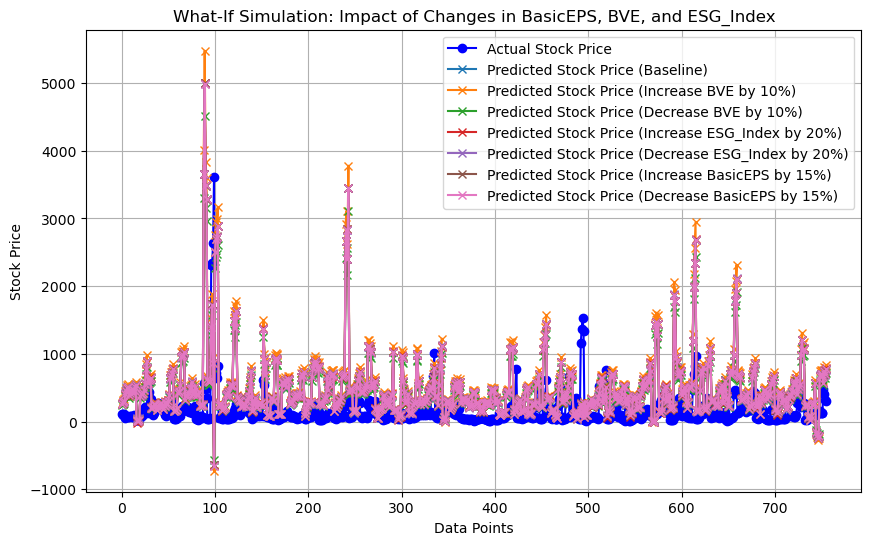

In [151]:
# Step 7: Visualize the stock price predictions for different scenarios
plt.figure(figsize=(10,6))
plt.plot(DATA['stock_FinancialYEnd'], label='Actual Stock Price', color='blue', marker='o')
for scenario, prediction in results.items():
    plt.plot(prediction, label=f'Predicted Stock Price ({scenario})', marker='x')
plt.title('What-If Simulation: Impact of Changes in BasicEPS, BVE, and ESG_Index')
plt.xlabel('Data Points')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

In [152]:
# Step 8: Analyze the sensitivity of each variable
# Calculate the mean change in each scenario
for scenario, prediction in results.items():
    mean_predicted = prediction.mean()
    print(f"Mean predicted stock price in the {scenario} scenario: {mean_predicted}")

# Step 9: Verify the model assumptions
# Compare the deviation of each scenario from the baseline
baseline_mean = results['Baseline'].mean()
for scenario, prediction in results.items():
    mean_predicted = prediction.mean()
    deviation = abs(mean_predicted - baseline_mean)
    print(f"Deviation from baseline in the {scenario} scenario: {deviation}")

Mean predicted stock price in the Baseline scenario: 474.17041842444775
Mean predicted stock price in the Increase BVE by 10% scenario: 512.2528997435211
Mean predicted stock price in the Decrease BVE by 10% scenario: 436.0879371053745
Mean predicted stock price in the Increase ESG_Index by 20% scenario: 474.17041842444775
Mean predicted stock price in the Decrease ESG_Index by 20% scenario: 474.17041842444775
Mean predicted stock price in the Increase BasicEPS by 15% scenario: 474.4581036324534
Mean predicted stock price in the Decrease BasicEPS by 15% scenario: 473.8827332164421
Deviation from baseline in the Baseline scenario: 0.0
Deviation from baseline in the Increase BVE by 10% scenario: 38.08248131907334
Deviation from baseline in the Decrease BVE by 10% scenario: 38.082481319073224
Deviation from baseline in the Increase ESG_Index by 20% scenario: 0.0
Deviation from baseline in the Decrease ESG_Index by 20% scenario: 0.0
Deviation from baseline in the Increase BasicEPS by 15% s

<h1>The End